<a href="https://colab.research.google.com/github/Girrajjangid/MachineLearning_Algorithms/blob/master/LogisticRegression/multiclass_logistic_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [3]:
print(np.nan)

nan


In [3]:
from keras.models import Sequential

Using TensorFlow backend.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from keras.datasets import mnist

Using TensorFlow backend.


In [43]:
  # data start downloading from amazon instance
(train_feature , train_label) , (test_feature , test_label ) = mnist.load_data()
train_feature.shape

(60000, 28, 28)

In [0]:
train_feature = train_feature/train_feature.max()
test_feature = test_feature/test_feature.max()

In [0]:
z = train_feature.shape[1] * train_feature.shape[2]
train_feature = train_feature.reshape(train_feature.shape[0],z)
test_feature = test_feature.reshape(test_feature.shape[0],z) # image size is same in both data sets


In [0]:
train_label_ohe = np.array(pd.get_dummies(train_label))
test_label_ohe = np.array(pd.get_dummies(test_label))

In [0]:
def softmax(theta0 , theta , features):
    labelscount = 10
    exp = np.exp(theta0 + np.dot(features , theta))  # observation * labels 1 columns for each decision boundary    
    sum_denominator = np.sum((exp) , axis=1)
    s = list(map(lambda i : exp[:,i] / sum_denominator ,  np.arange(labelscount)))
    return np.array(s).T  # observation * labels = probability of each value in their class wise

def cost_function(theta0 , theta , features , labels):
    return -(np.sum(np.matmul( np.log(softmax(theta0 , theta , features)).T  , labels )) / features.shape[0])
    

In [0]:
def gradient_decent(features , label , alpha , batch_size = 0):
    """one hot encoded label will pass, feature is train_data"""
    label_size = 10
    initial_theta0 = np.random.rand(1 , label_size)  # 1 * no. of labels 1 theta for each class
    initial_theta = np.random.rand(features.shape[1] , label_size)  # features * labels 

    i = 1
    itera = []
    fc = []

    while i<10000:
        index = np.random.randint(0,10000,size=(batch_size,))
        del_theta0 = (np.sum(softmax(initial_theta0 , initial_theta , features[index,:])  - label[index,:] , axis=0)) / features[index,:].shape[0]
        del_theta = (np.sum(np.matmul(features[index,:].T ,(softmax(initial_theta0 , initial_theta , features[index,:])  - label[index,:]) ))) / features[index,:].shape[0]
    
        final_theta0 = initial_theta0  - alpha * del_theta0
        final_theta  = initial_theta   - alpha * del_theta

        initial_cost = cost_function(initial_theta0 , initial_theta , features[index,:] , label[index,:])
        final_cost   = cost_function(final_theta0 , final_theta , features[index,:] , label[index,:])

        print('{} Average Negative Log : {}'.format(i , final_cost))
        i+=1
        itera.append(i)
        fc.append(final_cost)
        initial_theta0 = final_theta0
        initial_theta = final_theta
        
    return initial_theta,initial_theta0,itera,fc

In [74]:
mod_test = gradient_decent(train_feature,train_label_ohe,0.01,1)

1 Average Negative Log : 51.731488165428
2 Average Negative Log : 31.027290243363172
3 Average Negative Log : 50.752073269316725
4 Average Negative Log : 56.92027191366039
5 Average Negative Log : 53.26294699144138
6 Average Negative Log : 32.84239503013044
7 Average Negative Log : 57.32147061984766
8 Average Negative Log : 43.92615295834349
9 Average Negative Log : 41.4915098757901
10 Average Negative Log : 35.231249441826236
11 Average Negative Log : 57.83587490549024
12 Average Negative Log : 37.128555759169785
13 Average Negative Log : 36.722874842133095
14 Average Negative Log : 53.066785275577566
15 Average Negative Log : 47.88093552272033
16 Average Negative Log : 55.473355777397
17 Average Negative Log : 41.96181889920605
18 Average Negative Log : 40.181730794386446
19 Average Negative Log : 30.193424684042373
20 Average Negative Log : 39.34809740710328
21 Average Negative Log : 64.50746957564354
22 Average Negative Log : 55.42109839101614
23 Average Negative Log : 38.553270819

In [0]:
theta,theta0,itera,fc = mod_test


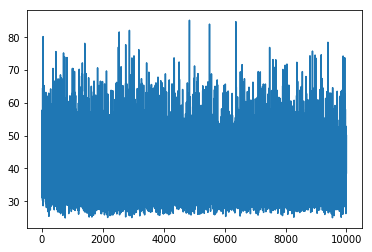

In [76]:
plt.plot(itera,fc)

In [0]:
y_pred = softmax(theta0,theta,train_feature)

In [0]:
y_pred = np.argmax(y_pred,axis=1)

In [79]:
c = 0
for i,j in enumerate(train_label):
  if train_label[i] == y_pred[i]:
    c+=1
print(c/600)

7.133333333333334


In [80]:
y_pred

array([9, 1, 6, ..., 9, 7, 1])

In [81]:
train_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)